# Project Description : 

Cardiovascular Disease - 10 Year Risk of Coronary Heart Disease Prediction.

# Problem statement : 

The dataset is from a cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients information. It includes over 3,400 records and 17 attributes.The main objective is to build a predictive model, which could help us in predicting the 10-year risk of future coronary heart disease (CHD) in a person.


# Data Description 

# Demographic:

•	Sex: male or female ("M" or "F") 

•	Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) 

# Behavioural 

•	is_smoking: whether or not the patient is a current smoker ("YES" or "NO") 

•	Cigs Per Day: the number of cigarettes that the person smoked on average in one day. (Can be considered continuous as one can have any number of cigarettes, even half a cigarette.) 

# Medical(history):

•	BP Meds: whether or not the patient was on blood pressure medication (Nominal) 

•	Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal) 

•	Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

•	Diabetes: whether or not the patient had diabetes (Nominal) 

# Medical(current):

•	Tot Chol: total cholesterol level (Continuous) 

•	Sys BP: systolic blood pressure (Continuous) 

•	Dia BP: diastolic blood pressure (Continuous) 

•	BMI: Body Mass Index (Continuous) 

•	Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) 

•	Glucose: glucose level (Continuous)

# Predict variable (desired target) 

•	10-year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”).                



# 1. Importing the following Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

loading the data

In [2]:
heart_data = pd.read_csv("D:\\Projects\\cardiovascular diseases\\data_cardiovascular_risk.csv")

Preview the data

In [3]:
heart_data.head(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


In [4]:
heart_data.shape

(3390, 17)

The dataset has 3390 observations and 17 features.

In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

# 2. Analyzing Data

visualizing the distribution of all the features.

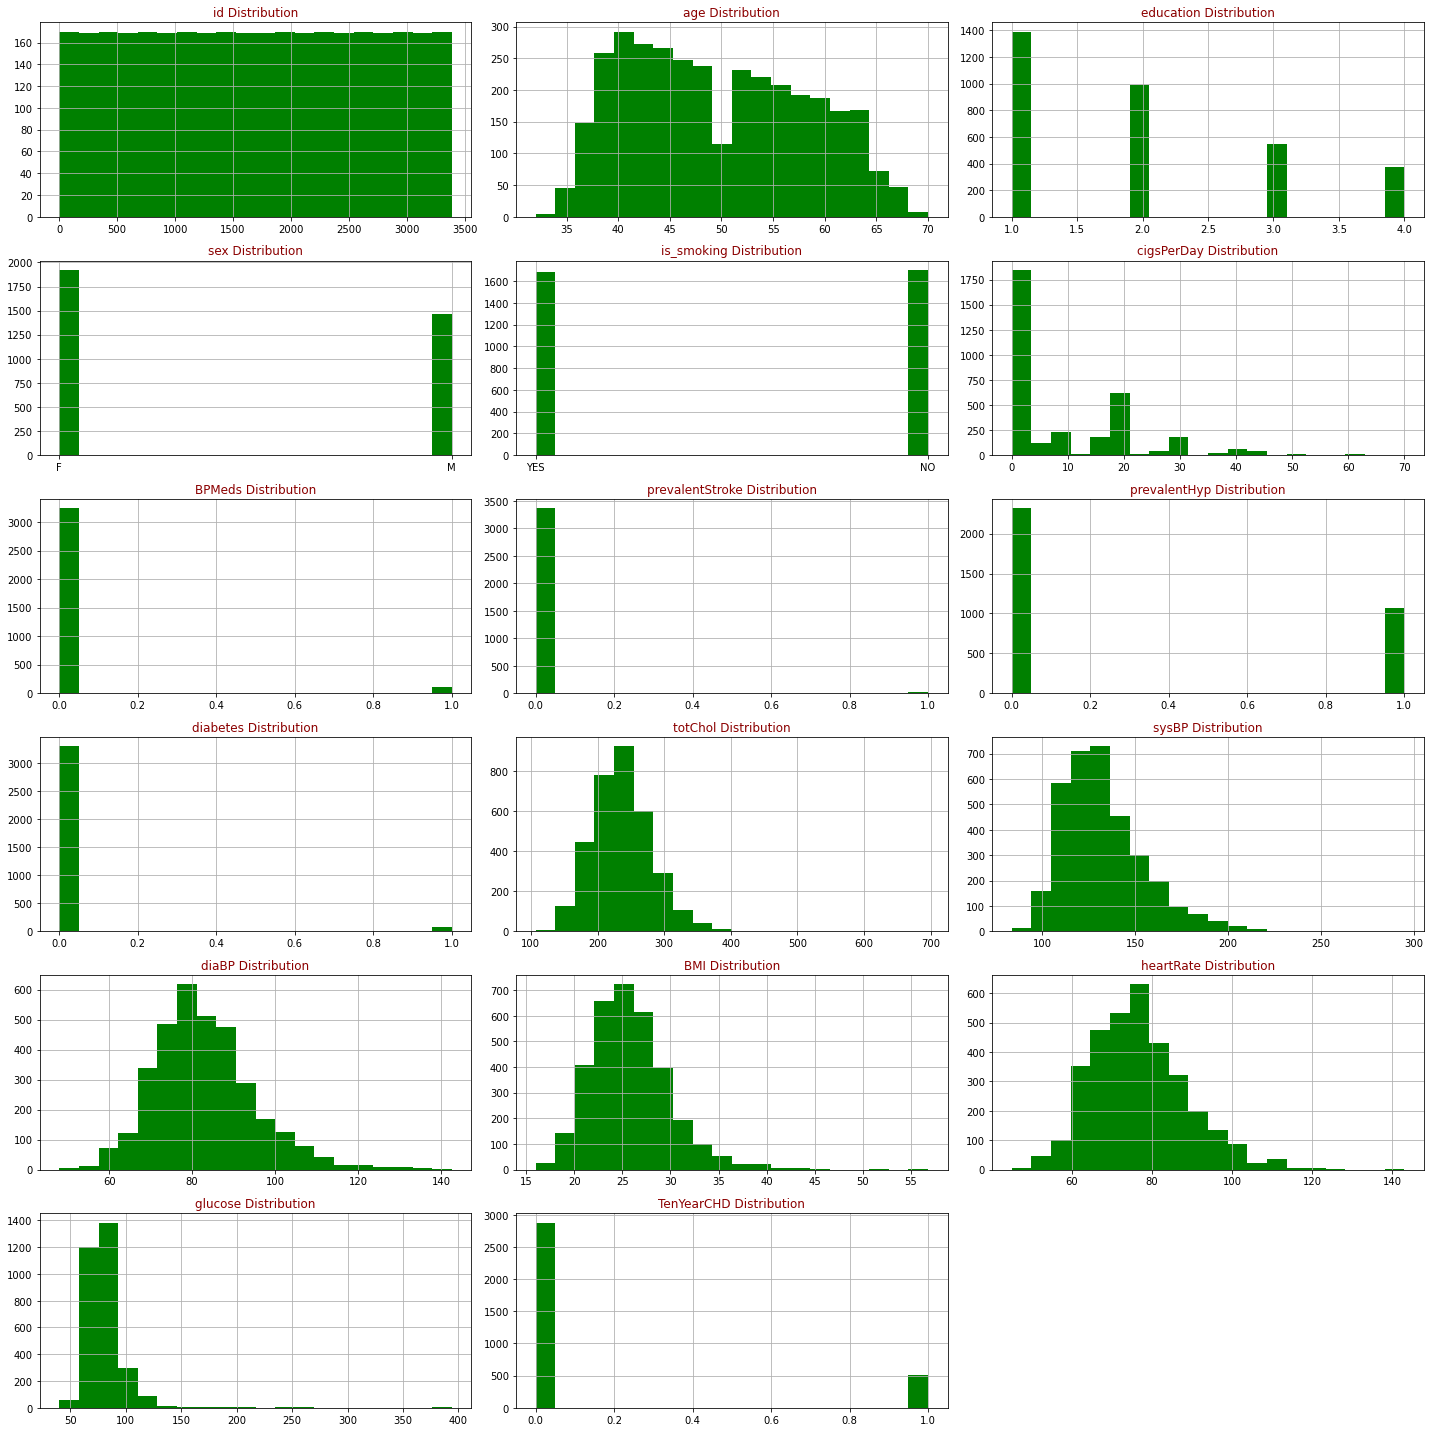

In [6]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='green')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heart_data,heart_data.columns,6,3)

visualizing the distribution of predictor variable

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

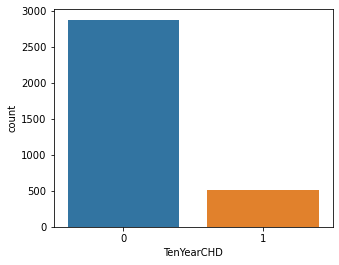

In [7]:
plt.figure(figsize=(5,4))
sns.countplot(x="TenYearCHD", data=heart_data)

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

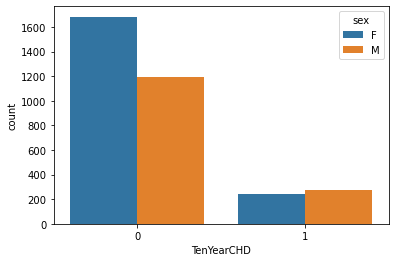

In [8]:
# checking which sex among male and female is more prone to coronary heart disease?
sns.countplot(x="TenYearCHD", hue="sex", data=heart_data)

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

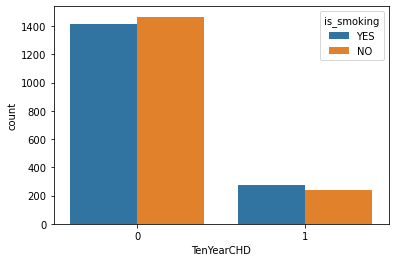

In [9]:
# checking whether smoking has any impact on the Tenyear CHD ?
sns.countplot(x="TenYearCHD", hue="is_smoking", data=heart_data)

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

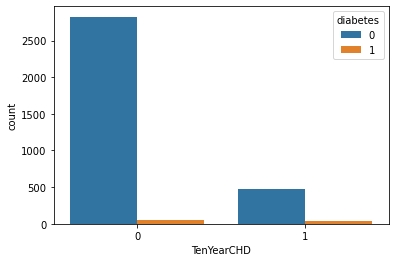

In [10]:
# checking if diabetes has any impact on CHD?
sns.countplot(x="TenYearCHD", hue="diabetes", data=heart_data)

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

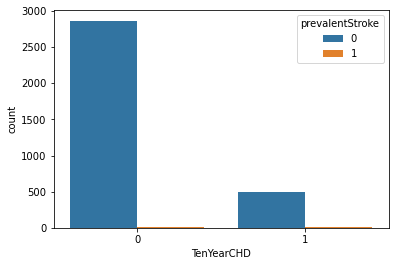

In [11]:
# checking if prevalentStroke has any impact on CHD?
sns.countplot(x="TenYearCHD", hue="prevalentStroke", data=heart_data)

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

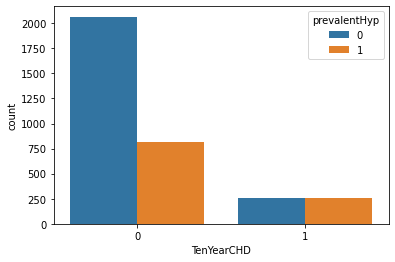

In [12]:
# checking if prevalentHyp has any impact on CHD?
sns.countplot(x="TenYearCHD", hue="prevalentHyp", data=heart_data)

From the above analysis, we came to know that features like sex, is_smoking, diabetes, prevalent stroke, prevalent hyp has some significance or some kind of effect with predictor variable.

In [13]:
heart_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


# 3. Data Wrangling and feature Engineering

In [14]:
print(heart_data["sex"].unique())
print(heart_data["is_smoking"].unique())

['F' 'M']
['YES' 'NO']


As there are no missing values in sex & is_smoking, we can encode them.

In [15]:
sex_dummy=pd.get_dummies(heart_data["sex"],drop_first=True)

In [16]:
is_smoking_dummy=pd.get_dummies(heart_data["is_smoking"],drop_first=True)

In [17]:
heart_data= pd.concat([heart_data,sex_dummy,is_smoking_dummy],axis=1)

In [18]:
heart_data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,M,YES
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1,0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,1,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,0,1
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,1,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,0,1


In [19]:
heart_data.drop(["sex","is_smoking","id","education"],axis=1,inplace=True)

In [20]:
heart_data["M"]=heart_data["M"].astype("int64")
heart_data["YES"]=heart_data["YES"].astype("int64")

In [21]:
heart_data.dtypes

age                  int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
M                    int64
YES                  int64
dtype: object

Here, we have removed sex, is_smoking as we have already encoded them. And from the basis intution we have removed id & education as they dont provide any weightage towards predictor feature prediction.

In [22]:
# check for missing values
heart_data.isnull().sum().sort_values(ascending=False)

glucose            304
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
age                  0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
M                    0
YES                  0
dtype: int64

In [23]:
#create new dataset for missing values
missing_heart_data = heart_data[["glucose","BPMeds","totChol","cigsPerDay","BMI","heartRate"]]

In [24]:
missing_heart_data

,glucose,BPMeds,totChol,cigsPerDay,BMI,heartRate
0,80.0,0.0,221.0,3.0,NaN,90.0
1,75.0,0.0,212.0,0.0,29.77,72.0
2,94.0,0.0,250.0,10.0,20.35,88.0
3,94.0,0.0,233.0,20.0,28.26,68.0
4,77.0,0.0,241.0,30.0,26.42,70.0
...,...,...,...,...,...,...
3385,103.0,0.0,261.0,0.0,29.28,70.0
3386,84.0,0.0,199.0,0.0,21.96,80.0
3387,72.0,0.0,352.0,3.0,28.92,73.0
3388,85.0,NaN,191.0,0.0,23.01,80.0


Now drop these columns from original data set

In [25]:
remaining_heart_data=heart_data.drop(["glucose","BPMeds","totChol","cigsPerDay","BMI","heartRate"],axis=1)

In [26]:
remaining_heart_data

,age,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,TenYearCHD,M,YES
0,64,0,0,0,148.0,85.0,1,0,1
1,36,0,1,0,168.0,98.0,0,1,0
2,46,0,0,0,116.0,71.0,0,0,1
3,50,0,1,0,158.0,88.0,1,1,1
4,64,0,0,0,136.5,85.0,0,0,1
...,...,...,...,...,...,...,...,...,...
3385,60,0,0,0,123.5,79.0,0,0,0
3386,46,0,0,0,102.0,56.0,0,0,0
3387,44,0,1,0,164.0,119.0,1,1,1
3388,60,0,1,0,167.0,105.0,0,1,0


Here, we used KNN(K nearest neighbour Imputation) method to fill the missing data of variables.

In [27]:
from sklearn.impute import KNNImputer

In [28]:
imputer=KNNImputer()

In [29]:
heart_dataimp = imputer.fit_transform(missing_heart_data)

In [30]:
heart_dataimp

array([[ 80.   ,   0.   , 221.   ,   3.   ,  27.736,  90.   ],
       [ 75.   ,   0.   , 212.   ,   0.   ,  29.77 ,  72.   ],
       [ 94.   ,   0.   , 250.   ,  10.   ,  20.35 ,  88.   ],
       ...,
       [ 72.   ,   0.   , 352.   ,   3.   ,  28.92 ,  73.   ],
       [ 85.   ,   0.   , 191.   ,   0.   ,  23.01 ,  80.   ],
       [ 92.   ,   0.   , 288.   ,   0.   ,  29.88 ,  79.   ]])

In [31]:
heart_dataimp =pd.DataFrame(heart_dataimp,columns=missing_heart_data.columns)

In [32]:
heart_dataimp

,glucose,BPMeds,totChol,cigsPerDay,BMI,heartRate
0,80.0,0.0,221.0,3.0,27.736,90.0
1,75.0,0.0,212.0,0.0,29.770,72.0
2,94.0,0.0,250.0,10.0,20.350,88.0
3,94.0,0.0,233.0,20.0,28.260,68.0
4,77.0,0.0,241.0,30.0,26.420,70.0
...,...,...,...,...,...,...
3385,103.0,0.0,261.0,0.0,29.280,70.0
3386,84.0,0.0,199.0,0.0,21.960,80.0
3387,72.0,0.0,352.0,3.0,28.920,73.0
3388,85.0,0.0,191.0,0.0,23.010,80.0


In [33]:
heart_dataimp.isnull().sum().sort_values(ascending=False)

glucose       0
BPMeds        0
totChol       0
cigsPerDay    0
BMI           0
heartRate     0
dtype: int64

 Therefore there are no missing values. now add both remainig_heart_data & heart_dataimp 

In [34]:
new_heart_data=pd.concat([remaining_heart_data,heart_dataimp],axis=1) #column concatenation

In [35]:
new_heart_data

,age,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,TenYearCHD,M,YES,glucose,BPMeds,totChol,cigsPerDay,BMI,heartRate
0,64,0,0,0,148.0,85.0,1,0,1,80.0,0.0,221.0,3.0,27.736,90.0
1,36,0,1,0,168.0,98.0,0,1,0,75.0,0.0,212.0,0.0,29.770,72.0
2,46,0,0,0,116.0,71.0,0,0,1,94.0,0.0,250.0,10.0,20.350,88.0
3,50,0,1,0,158.0,88.0,1,1,1,94.0,0.0,233.0,20.0,28.260,68.0
4,64,0,0,0,136.5,85.0,0,0,1,77.0,0.0,241.0,30.0,26.420,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,0,0,0,123.5,79.0,0,0,0,103.0,0.0,261.0,0.0,29.280,70.0
3386,46,0,0,0,102.0,56.0,0,0,0,84.0,0.0,199.0,0.0,21.960,80.0
3387,44,0,1,0,164.0,119.0,1,1,1,72.0,0.0,352.0,3.0,28.920,73.0
3388,60,0,1,0,167.0,105.0,0,1,0,85.0,0.0,191.0,0.0,23.010,80.0


In [36]:
new_heart_data.isnull().sum().sort_values(ascending=False)

age                0
prevalentStroke    0
prevalentHyp       0
diabetes           0
sysBP              0
diaBP              0
TenYearCHD         0
M                  0
YES                0
glucose            0
BPMeds             0
totChol            0
cigsPerDay         0
BMI                0
heartRate          0
dtype: int64

In [37]:
new_heart_data.head()

,age,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,TenYearCHD,M,YES,glucose,BPMeds,totChol,cigsPerDay,BMI,heartRate
0,64,0,0,0,148.0,85.0,1,0,1,80.0,0.0,221.0,3.0,27.736,90.0
1,36,0,1,0,168.0,98.0,0,1,0,75.0,0.0,212.0,0.0,29.770,72.0
2,46,0,0,0,116.0,71.0,0,0,1,94.0,0.0,250.0,10.0,20.350,88.0
3,50,0,1,0,158.0,88.0,1,1,1,94.0,0.0,233.0,20.0,28.260,68.0
4,64,0,0,0,136.5,85.0,0,0,1,77.0,0.0,241.0,30.0,26.420,70.0


In [38]:
new_heart_data.var()

age                  73.837553
prevalentStroke       0.006449
prevalentHyp          0.215964
diabetes              0.025012
sysBP               496.934581
diaBP               144.566502
TenYearCHD            0.128053
M                     0.245549
YES                   0.250068
glucose             545.191766
BPMeds                0.028711
totChol            2027.539619
cigsPerDay          140.545407
BMI                  16.873534
heartRate           143.287654
dtype: float64

In [39]:
new_heart_data["TenYearCHD"].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [40]:
X = new_heart_data.drop(columns="TenYearCHD",axis=1)

In [41]:
y = new_heart_data["TenYearCHD"]

 Here we are dealing with imbalanced data. so it is better to balance the data.
 And we are gonna use, oversampling - Random oversampling duplicates or copies randomly selected records or observations from minority class.

In [42]:
# oversampling
from imblearn.over_sampling import RandomOverSampler

In [43]:
ros= RandomOverSampler(random_state=1)

In [44]:
X_ros,y_ros=ros.fit_resample(X,y)

In [45]:
print(pd.DataFrame(y).value_counts())
print(pd.DataFrame(y_ros).value_counts())

TenYearCHD
0             2879
1              511
dtype: int64
TenYearCHD
0             2879
1             2879
dtype: int64


Now, we have performed oversampling on the dataset, and the new shape of the dataset is 5758 observations and 17 columns including the predictor variable. And oversampling technique is choosen to overcome loss of data. And higher the number of observations, higher the accuracy of fitting machine learning models.

In [46]:
X_ros

,age,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,M,YES,glucose,BPMeds,totChol,cigsPerDay,BMI,heartRate
0,64,0,0,0,148.0,85.0,0,1,80.0,0.0,221.0,3.0,27.736,90.0
1,36,0,1,0,168.0,98.0,1,0,75.0,0.0,212.0,0.0,29.770,72.0
2,46,0,0,0,116.0,71.0,0,1,94.0,0.0,250.0,10.0,20.350,88.0
3,50,0,1,0,158.0,88.0,1,1,94.0,0.0,233.0,20.0,28.260,68.0
4,64,0,0,0,136.5,85.0,0,1,77.0,0.0,241.0,30.0,26.420,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,44,0,1,0,147.5,96.0,0,1,78.8,0.0,234.6,9.0,30.570,78.0
5754,63,0,1,0,192.5,125.0,1,1,83.0,0.0,203.0,25.0,26.180,80.0
5755,56,0,0,0,165.0,112.0,1,1,78.0,0.0,300.0,20.0,23.680,86.0
5756,59,0,1,0,148.5,90.0,0,0,83.0,1.0,201.0,0.0,25.850,65.0


In [47]:
y_ros

0       1
1       0
2       0
3       1
4       0
       ..
5753    1
5754    1
5755    1
5756    1
5757    1
Name: TenYearCHD, Length: 5758, dtype: int64

Now split the data into train and test groups

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.25, stratify=y_ros, random_state=1)

In [50]:
print(X_ros.shape, X_train.shape, X_test.shape)
print(y_ros.shape, y_train.shape, y_test.shape)

(5758, 14) (4318, 14) (1440, 14)
(5758,) (4318,) (1440,)


# Prediction using ML Classification Algorithms

 # What is Logistic Regression?

- Logistic Regression is a “Supervised machine learning” algorithm that can be used to model the probability of a certain class or event. It is used when the data is linearly separable and the outcome is binary or dichotomous in nature.

- That means Logistic regression is usually used for Binary classification problems.

- Binary Classification refers to predicting the output variable that is discrete in two classes.

- A few examples of Binary classification are Yes/No, Pass/Fail, Win/Lose, Cancerous/Non-cancerous, etc.

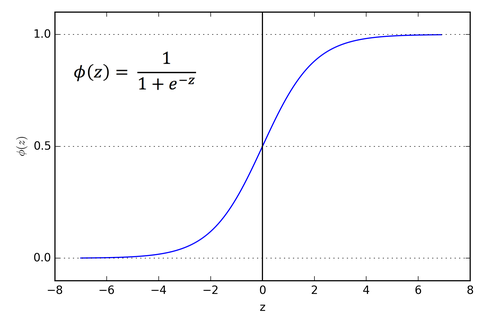

# How does Logistic Regression Work?

* The logistic regression equation is quite similar to the linear regression model.

* Consider we have a model with one predictor “x” and one Bernoulli response variable “ŷ” and p is the  probability of ŷ=1. The linear equation can be written as:

                                        p=b0+b1x
 
* The right-hand side of the equation (b0+b1x) is a linear equation and can hold values that exceed the range (0,1). But we know probability will always be in the range of (0,1).

* To overcome that, we predict odds instead of probability.

Odds: The ratio of the probability of an event occurring to the probability of an event not occurring.

                                     Odds = p/(1-p)

* The equation 1 can be re-written as: p/(1−p)=b0+b1x
 
* Odds can only be a positive value, to tackle the negative numbers, we predict the logarithm of odds.

                             Log of odds = ln(p/(1-p))

                                ln(p/(1−p))=b0+b1x
 
                          exp(ln(p/(1−p)))=exp(b0+b1x)
 
                              eln(p/(1−p))=e(b0+b1x)
 
                     From the inverse rule of logarithms,
                     
                             p/(1−p)=e(b0+b1x)
 
                         Simple algebraic manipulations
                             
                             p=(1−p)∗e(b0+b1x)
 
                          p=e(b0+b1x)−p∗e(b0+b1x)
 
                 Taking p as common on the right-hand side
                      
                        p=p∗((e(b0+b1x)/p−e(b0+b1x))
 
                         p=e(b0+b1x)/(1+e(b0+b1x))
 
       Dividing numerator and denominator by e(b0+b1x) on the right-hand side

                           p=1/(1+e−(b0+b1x))
 
* Similarly, the equation for a logistic model with ‘n’ predictors is as below:
p=1/(1+e−(b0+b1x1+b2x2+b3x3+...+bnxn))
 
* The right side part looks familiar, Yes, it is the sigmoid function. It helps to squeeze the output to be in the range between 0 and 1.

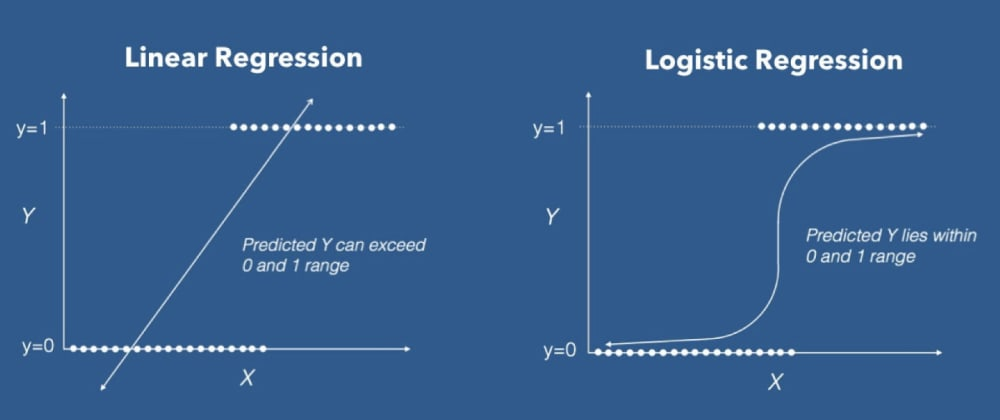

# ●	Fitting different models
For modelling we tried various classification algorithms like:

1.	Logistic Regression
2.	Random Forest Classifier
3.	Gradient Boosting classifier
4.	Support vector machines


# 1. Logistic Regression Algorithm

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
LR= LogisticRegression()

In [53]:
LRModel = LR.fit(X_train,y_train)

In [54]:
y_predict = LR.predict(X_test)

In [55]:
# model score
LRModel.score(X_train,y_train)

0.6542380731820288

In [56]:
# classification report
from sklearn.metrics import classification_report

In [57]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.65      0.64      0.64       720
           1       0.64      0.66      0.65       720

    accuracy                           0.65      1440
   macro avg       0.65      0.65      0.65      1440
weighted avg       0.65      0.65      0.65      1440



In [58]:
# confusion matrix
from sklearn.metrics import confusion_matrix

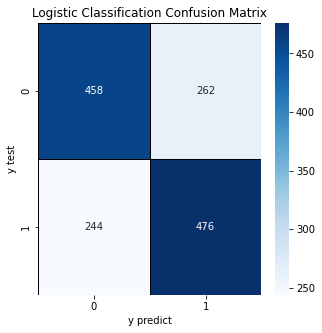

In [59]:
LR_confusion_matrix = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(LR_confusion_matrix, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="Blues")
plt.title('Logistic Classification Confusion Matrix')
plt.xlabel('y predict')
plt.ylabel('y test')
plt.show()

The confusion matrix shows 458+476 = 934 correct predictions and 244+262 = 506 incorrect ones.

True Positives: 476

True Negatives: 458

False Positives: 262 (Type I error)

False Negatives: 244 ( Type II error)

In [60]:
# accuracy score
from sklearn.metrics import accuracy_score

In [61]:
accuracy_score(y_test,y_predict)

0.6486111111111111

In [62]:
# auc_roc curve
from sklearn.metrics import plot_roc_curve

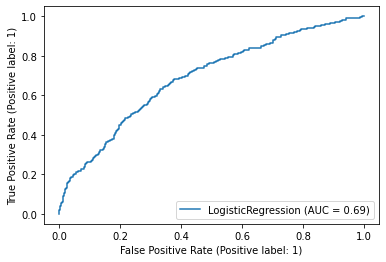

In [63]:
plot_roc_curve(LRModel,X_test,y_test)

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
cross_val_score(LRModel,X_train,y_train)

array([0.61805556, 0.6712963 , 0.65393519, 0.62456547, 0.66512167])

# 2. Random Forest classifier Algorithm

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
RF=RandomForestClassifier(n_estimators=10)

In [68]:
RFmodel=RF.fit(X_train,y_train)

In [69]:
RFPredict=RFmodel.predict(X_test)

In [70]:
# model score
RFmodel.score(X_train,y_train) # train data accuracy

0.9993052339045855

In [71]:
# classification report
print(classification_report(y_test, RFPredict))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       720
           1       0.94      0.99      0.96       720

    accuracy                           0.96      1440
   macro avg       0.96      0.96      0.96      1440
weighted avg       0.96      0.96      0.96      1440



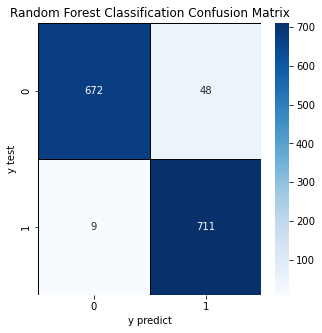

In [72]:
# confusion matrix
RF_confusion_matrix = confusion_matrix(y_test, RFPredict)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(RF_confusion_matrix, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="Blues")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('y predict')
plt.ylabel('y test')
plt.show()

The confusion matrix shows 707+671= 1378 correct predictions and 49+13= 62 incorrect ones.

True Positives: 707

True Negatives: 671

False Positives: 49 (Type I error)

False Negatives: 13 ( Type II error)

In [73]:
# accuracy score
test_data_accuracy = accuracy_score(RFPredict, y_test)

In [74]:
test_data_accuracy # test data accuracy

0.9604166666666667

In [75]:
model= pd.DataFrame({'Model': ['Random Forest'],'Train Score': [RFmodel.score(X_train,y_train)],'Test Score': [test_data_accuracy]})

In [76]:
model.sort_values(by='Test Score', ascending=False)

,Model,Train Score,Test Score
0,Random Forest,0.999305,0.960417


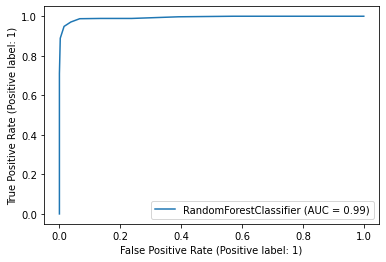

In [77]:
# auc_roc curve
plot_roc_curve(RFmodel,X_test,y_test)

In [78]:
# cross validation score
cross_val_score(RFmodel,X_train,y_train)

array([0.93402778, 0.92013889, 0.92824074, 0.94553882, 0.94206257])

# 3. Gradient Boosting Algorithm

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
gbm=GradientBoostingClassifier(n_estimators=1100)

In [81]:
gbmmodel=gbm.fit(X_train,y_train)

In [82]:
gbmmodel.score(X_train,y_train)

0.9930523390458545

In [83]:
gbmpredict=gbmmodel.predict(X_test)

In [84]:
# model score
gbmmodel.score(X_train,y_train) # train data accuracy

0.9930523390458545

In [85]:
# classification report
print(classification_report(y_test, gbmpredict))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       720
           1       0.86      0.97      0.91       720

    accuracy                           0.91      1440
   macro avg       0.91      0.91      0.91      1440
weighted avg       0.91      0.91      0.91      1440



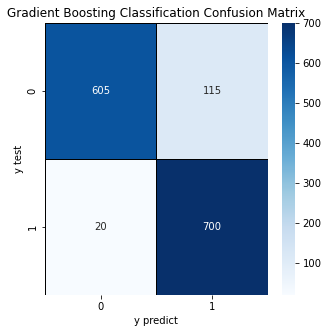

In [86]:
# confusion matrix
GB_confusion_matrix = confusion_matrix(y_test, gbmpredict)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(GB_confusion_matrix, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="Blues")
plt.title('Gradient Boosting Classification Confusion Matrix')
plt.xlabel('y predict')
plt.ylabel('y test')
plt.show()

The confusion matrix shows 700+605=1305 correct predictions and 115+20=135 incorrect ones.

True Positives: 700

True Negatives: 605

False Positives: 115 (Type I error)

False Negatives: 20 ( Type II error)

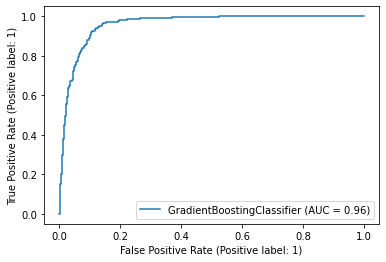

In [87]:
# auc_roc curve
plot_roc_curve(gbmmodel,X_test,y_test)

In [88]:
# cross validation score
cross_val_score(RFmodel,X_train,y_train)

array([0.93402778, 0.92592593, 0.92824074, 0.95133256, 0.94785632])

# 4. support vector machines (svm)

In [89]:
from sklearn.svm import SVC

In [90]:
svm = SVC()

In [91]:
svmmodel=svm.fit(X_train,y_train)

In [92]:
svmmodel.score(X_train,y_train)

0.6630384437239463

In [93]:
svmpredict=svmmodel.predict(X_test)

In [94]:
# classification report
print(classification_report(y_test, svmpredict))

              precision    recall  f1-score   support

           0       0.68      0.65      0.67       720
           1       0.67      0.69      0.68       720

    accuracy                           0.67      1440
   macro avg       0.67      0.67      0.67      1440
weighted avg       0.67      0.67      0.67      1440



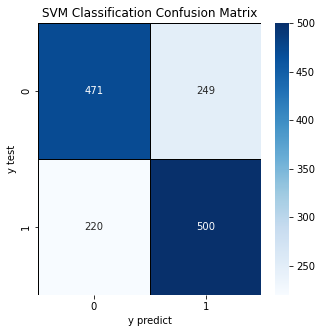

In [95]:
svm_confusion_matrix = confusion_matrix(y_test, svmpredict)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svm_confusion_matrix, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="Blues")
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('y predict')
plt.ylabel('y test')
plt.show()

The confusion matrix shows 471+500 = 971 correct predictions and 249+220 = 469 incorrect ones.

True Positives: 500

True Negatives: 471

False Positives: 249 (Type I error)

False Negatives: 220 ( Type II error)

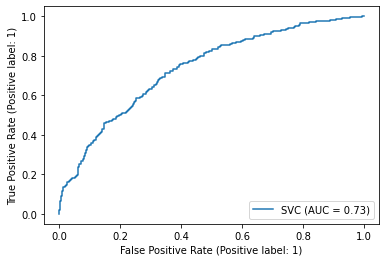

In [96]:
# auc_roc curve
plot_roc_curve(svmmodel,X_test,y_test)

In [97]:
# cross validation score
cross_val_score(svmmodel,X_train,y_train)

array([0.66666667, 0.68518519, 0.63657407, 0.65932793, 0.64658169])

# Final Verdict

From the above, prediction we came to know that Random forest classifier works well with great accuracy and AUC score, and also from confusion matrix, we came to know that we have minimized "Type 2 error" with Random forest classifier.